<a href="https://colab.research.google.com/github/Srividya47/DataScience/blob/main/fork_of_edm_in_ids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker imag  e: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
()
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

()

In [2]:
!pip install pyEDM

     |████████████████████████████████| 6.0 MB 5.2 MB/s 
     |████████████████████████████████| 213 kB 33.2 MB/s 


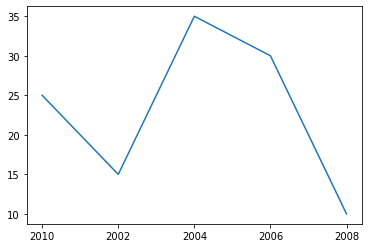

In [3]:
import matplotlib.pyplot as plt

# Creating data
year = ['2010', '2002', '2004', '2006', '2008']
production = [25, 15, 35, 30, 10]

# Plotting barchart
plt.plot(year, production)

# Saving the figure.
plt.savefig("output.jpg")

# Saving figure by changing parameter values
plt.savefig("output1", facecolor='y', bbox_inches="tight",
			pad_inches=0.3, transparent=True)

In [4]:
#pyEDM.sampleData

In [5]:
#pyEDM.sampleData["TentMap"].describe()

In [6]:
#dir(pyEDM)

EmbedDimension( dataFrame = sampleData["TentMap"], lib = "1 100", pred = "201 500", columns = "TentMap", target = "TentMap") 



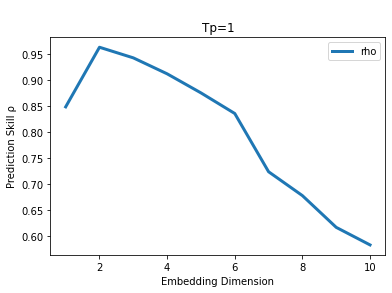

PredictInterval( dataFrame = sampleData["TentMap"], lib = "1 100", pred = "201 500", E = 2, columns = "TentMap", target = "TentMap") 



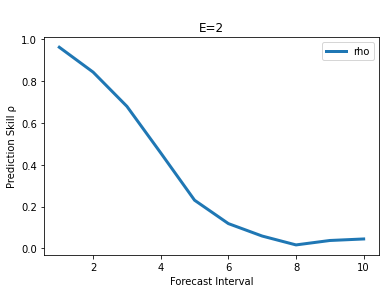

PredictNonlinear( dataFrame = sampleData["TentMapNoise"], lib = "1 100", pred = "201 500", E = 2, columns = "TentMap", target = "TentMap" ) 



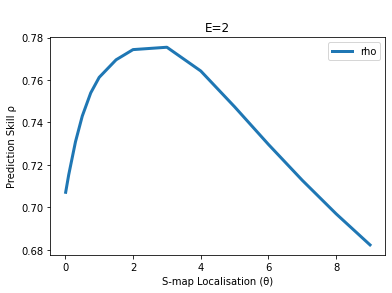

Simplex( dataFrame = sampleData["block_3sp"], lib = "1 99", pred = "100 195",  E = 3, embedded = True, showPlot = True, const_pred = True, columns="x_t y_t z_t", target="x_t") 



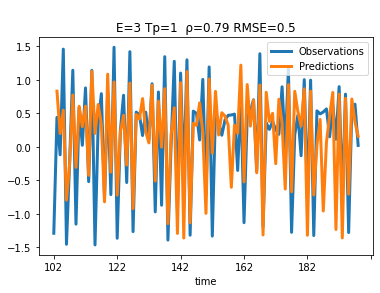

Simplex( dataFrame = sampleData["block_3sp"], lib = "1 99", pred = "105 190",  E = 3, showPlot = True, const_pred = True, columns = "x_t", target = "x_t") 



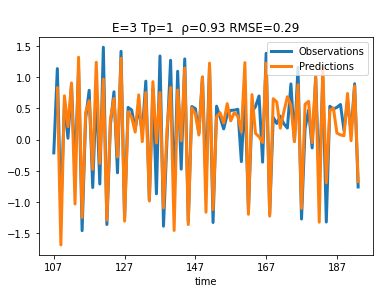

Multiview( dataFrame = sampleData["block_3sp"], lib = "1 99", pred = "105 190",  E = 3, columns = "x_t y_t z_t", target = "x_t", showPlot = True) 



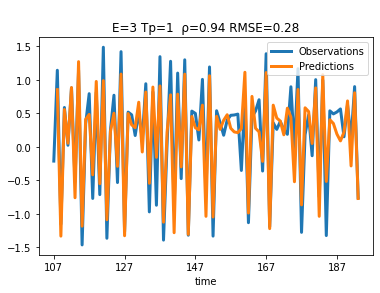

SMap( dataFrame = sampleData["circle"], lib = "1 100", pred = "110 190", theta = 4, E = 2, verbose = False, showPlot = True, embedded = True, columns = "x y", target = "x") 



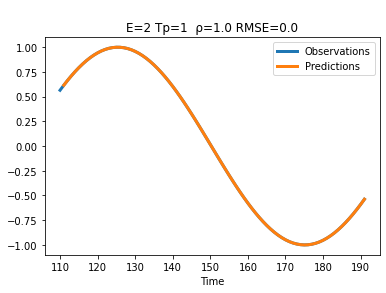

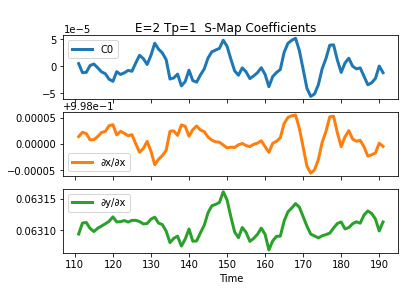

CCM( dataFrame = sampleData["sardine_anchovy_sst"], E = 3, Tp = 0, columns = "anchovy", target = "np_sst", libSizes = "10 70 10", sample = 100, verbose = False,  showPlot = True) 



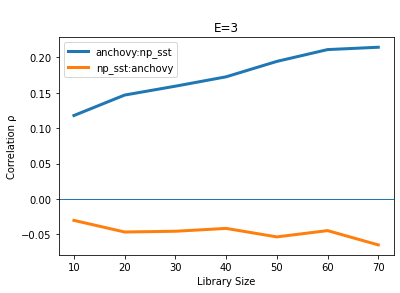

In [7]:
import pyEDM
pyEDM.Examples()

In [8]:
df = pd.read_csv("../input/mqtt-ids/scan_A.csv" )

FileNotFoundError: ignored

In [ ]:
df

In [ ]:
# removing columns that have all nan elements and those rows that have the same value as it's column name
nanAttr = []

for i in df.columns:
    df.drop(df[df[i] == i].index, inplace = True)
    count = df[i].isna().sum()
    if count > len(df)*0.9 :
        nanAttr.append(i)
        
    #print(i,count)
    #if count == len(df) :
     #   nanAttr.append(i)
#print(nanAttr)

#index_names = df[df["is_attack"]=='is_attack'].index
#df["is_attack"].unique()

#df.drop(index_names, inplace = True)
#removing attributes with more than 90 perc values nan
df.drop(nanAttr,axis=1 ,inplace=True)

#df.drop(nanAttr,axis=1 ,inplace=True)
#df.drop( df[df[i]=="is_attack" ])

In [ ]:
#eleminating extranous variables
for c in df.columns.tolist()[:-1]:
    #print(c,len(df[c].unique()),df[c].unique())
    #if len(df[c].unique()) ==1 or len(df.loc[df['is_attack'] == 1, c].unique()) ==1:
    if len(df[c].unique()) ==1:
        print(c)
        df.pop(c)

In [ ]:
df_feat = df.iloc[:,:]

In [ ]:
df.fillna(df.median(), inplace=True)

In [ ]:
non_numeric_columns = list(df_feat.select_dtypes(exclude=[np.number]).columns)
#struct_data = struct_data.dropna(axis = 0, how ='any') 
print(non_numeric_columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
    df_feat[col] = le.fit_transform(df_feat[col].astype(str))

print(df_feat.head(16))

In [ ]:
#columns= df_feat.columns[1:-1]
#columns = columns.tolist()
#columns

In [ ]:
#from sklearn.preprocessing import StandardScaler

# create a scaler object
#std_scaler = StandardScaler()
#std_scaler
# fit and transform the data
#df_feat = pd.DataFrame(std_scaler.fit_transform(df_feat), columns=df_feat.columns)

#df_feat

In [ ]:
print(df_feat)

In [ ]:
#dir(pyEDM)

In [ ]:
df_feat.rename(columns = {'timestamp':'time'}, inplace = True)

In [ ]:
df_feat['time'] = df_feat['time'].astype(int)

In [ ]:

df_feat.columns.tolist()

In [ ]:
print(df_feat)

In [ ]:
print(dir(pyEDM.EmbedDimension))

In [ ]:
cols = df_feat.columns.tolist()

In [ ]:
print(cols)

In [ ]:
len(df_feat)

In [ ]:
total = len(df_feat)

libEnd = 0.8*total

print(total," ",libEnd)

 We can estimate an optimal embedding dimension with the EmbedDimension() function. This function evaluates simplex prediction accuracy over a range of embedding dimensions, the embedding dimension E with the highest predictive accuracy is selected for system analysis. This embedding is presumed to best represent and "disentangle" the manifold.

In [ ]:
import matplotlib.pyplot as plt
plt.plot( df_feat["is_attack"][0:6000] );

In [ ]:
def getStats(predicted,observed):
    stats = {'tp':0,'tn':0,'fp':0,'fn':0}
    for i in range(1,len(predicted)):
        if predicted[i] < 0.5 and observed[i] == 0:
                stats['tp'] += 1
        elif predicted[i]>=0.5 and observed[i] == 1:
                stats['tn'] += 1
        elif predicted[i] <0.5 and observed[i] == 1:
                stats['fp'] += 1
        else:
                stats['fn'] += 1
    return stats

In [ ]:
def getAccuracy(stats):
    accuracy = (stats['tp']+stats['tn'])/(stats['tp']+stats['tn']+stats['fp']+stats['fn'])
    return accuracy

In [ ]:
def getPrecision(stats):
    pres = (stats['tp'])/(stats['tp']+stats['fp'])
    return pres

In [ ]:
def getRecall(stats):
    recall = (stats['tp'])/(stats['tp']+stats['fn'])
    return recall

In [ ]:
def getF1Score(pres,recall):
    f1 = 2*(pres*recall)/(recall+pres)
    return f1

In [ ]:
def getMeasures(objects):
    #print(objects)
    s = getStats(objects.Predictions,objects.Observations)
    print(s)
    measurements = {
        "Accuracy": getAccuracy(s),
        "Precison" : getPrecision(s),
        "Recall" : getRecall(s)
    }
    measurements['F1Score'] = getF1Score(measurements['Precison'],measurements['Recall'])
    return measurements

In [ ]:
pyEDM.EmbedDimension( dataFrame = df_feat, lib = "1 2000", pred = "3001 6000", columns = "src_ip dst_ip protocol ttl ip_len ip_flag_df ip_flag_mf ip_flag_rb src_port dst_port tcp_flag_res tcp_flag_ns tcp_flag_cwr tcp_flag_ecn tcp_flag_urg tcp_flag_ack tcp_flag_push tcp_flag_reset tcp_flag_syn tcp_flag_fin mqtt_messagetype mqtt_messagelength", target = "is_attack")

In [ ]:
pyEDM.EmbedDimension( dataFrame = df_feat, lib = "1 2000", pred = "3001 6000", columns = "is_attack", target = "is_attack")

contrast to the nearest-neighbor interpolation of simplex projection, the S-map forecasting method
(Sugihara 1994) fits local linear maps to describe the dynamics. In addition to the standard set of parameters
for a lagged-coordinate reconstruction as in simplex, S-maps contain a nonlinear localisation parameter, θ,
that determines the degree to which points are weighted when fitting the local linear map. For example, when
θ = 0, all points are equally weighted, such that the local linear map is identical for different points in the
reconstructed state-space. As such, the S-map will be identical to a global linear map (i.e. an autoregressive
model). When values of θ are greater than 0, nearby points in the state space receive larger weight, and the
local linear map can vary in state-space to accommodate nonlinear behavior.
Consequently, if the time series are sampled from autoregressive red noise, then the linear model (θ = 0)
should produce better forecasts, because the global linear map (which will, in effect, be fitted to more data
points) will reduce the effects of observation error compared to local linear maps. In contrast, if forecast skill
increases for θ > 0, then the results are suggestive of nonlinear dynamics wherein better forecasts are achieved
when the local linear map can change depending on the location in state-space: it is a better description of
state-dependent behavior.

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
lmSolvers = {
    'SVD'          : None, 
    'Ridge'        : Ridge( alpha = 0.05 ),
    'Lasso'        : Lasso( alpha = 0.005 ),
    'ElasticNet'   : ElasticNet( alpha = 0.001, l1_ratio = 0.001 ),
    'RidgeCV'      : RidgeCV(),
    'LassoCV'      : LassoCV( cv = 5 ),
    'ElasticNetCV' : ElasticNetCV( l1_ratio = [.05,.1,.5,.7,.9,.95,1],cv = 5 )
}

In [ ]:
'''for solverName in lmSolvers.keys() :
    print(solverName)
    result = pyEDM.SMap( dataFrame = df_feat,
                         lib = "1 100", pred = "101 198",
                         embedded = True, E = 2, theta = 3,
                         columns = "is_attack", target = "is_attack", showPlot = True,
                         solver = lmSolvers[ solverName ] )'''

In [ ]:
pyEDM.PredictNonlinear( dataFrame = df_feat, lib = "1 2000", pred = "3001 6000", columns = "src_ip dst_ip protocol ttl ip_len ip_flag_df ip_flag_mf ip_flag_rb src_port dst_port tcp_flag_res tcp_flag_ns tcp_flag_cwr tcp_flag_ecn tcp_flag_urg tcp_flag_ack tcp_flag_push tcp_flag_reset tcp_flag_syn tcp_flag_fin mqtt_messagetype mqtt_messagelength is_attack",target = "is_attack", embedded = True, E=0 );

In [ ]:
prednon = pyEDM.PredictNonlinear( dataFrame = df_feat, lib = "1 11000", pred = "12001 13600", columns = "is_attack",target = "is_attack", embedded = True, E=1 );

In [ ]:
print(prednon)

In [ ]:
#pyEDM.PredictNonlinear( dataFrame = df_feat, lib="1 5000", pred="5001 10000", columns = "src_ip dst_ip protocol ttl ip_len ip_flag_df ip_flag_mf ip_flag_rb src_port dst_port tcp_flag_res tcp_flag_ns tcp_flag_cwr tcp_flag_ecn tcp_flag_urg tcp_flag_ack tcp_flag_push tcp_flag_reset tcp_flag_syn tcp_flag_fin mqtt_messagetype mqtt_messagelength", embedded = True, E=1 );

Based on a rule of thumb, it can be said that RMSE values **between 0.2 and 0.5** shows that the model can relatively predict the data accurately. In addition, Adjusted **R-squared more than 0.75 is a very good value ** for showing the accuracy. In some cases, **Adjusted R-squared of 0.4 or more is acceptable as well**.

In [ ]:
simp = pyEDM.Simplex( dataFrame = df_feat, lib = "1 113", pred = "28114 41392",  embedded = True, showPlot = True, const_pred = True, columns = "src_ip dst_ip protocol ttl ip_len ip_flag_df ip_flag_mf ip_flag_rb src_port dst_port tcp_flag_res tcp_flag_ns tcp_flag_cwr tcp_flag_ecn tcp_flag_urg tcp_flag_ack tcp_flag_push tcp_flag_reset tcp_flag_syn tcp_flag_fin mqtt_messagetype mqtt_messagelength is_attack", target = "is_attack")

In [ ]:
print(simp)

In [ ]:
print(simp.Observations)

In [ ]:
print(simp.Predictions)

In [ ]:
print(pyEDM.ComputeError(simp.Predictions,simp.Observations))

In [ ]:
#ccm = pyEDM.CCM( dataFrame = df_feat, E=2, columns = "src_ip dst_ip protocol ttl ip_len src_port dst_port tcp_flag_res tcp_flag_ecn tcp_flag_urg mqtt_messagelength", target = "is_attack",libSizes  = "10 70 10", showPlot=True, sample=100);

Simplex is a nearest neighbor projection. It locates the knn nearest neighbors to the query point (location in the state-space from which a prediction is desired) within the library phase-space. knn is typically set to E+1, where E is the system dimension. These knn points define an E+1 dimensional simplex in the state-space. The prediction is computed as the average of the weighted phase-space simplex projected Tp points ahead. Each neighbor is weighted proportional to their distance to the query point as described in Sugihara and May 1990. Simplex is the most direct projection technique in the EDM package, operates with minimal assumptions, and is the core algorithm for the evaluation of embedding dimension EmbedDimension(), evaluation of temporal forecast predictability PredictInterval(), convergent cross mapping CCM(), and multiview embedding Multiview().

In [ ]:

sim = pyEDM.Simplex( dataFrame = df_feat, lib = "1 30000", pred = "35001 45000", predictFile="outputFile" ,pathOut='./output' , parameterList= True, embedded = True, verbose= True, showPlot = True, const_pred = True, columns = "is_attack", target = "is_attack")

In [ ]:
plt.title("Simplex")
plt.plot(sim['predictions'].time,sim['predictions'].Predictions, color='r', label='predictions')
plt.plot(sim['predictions'].time, sim['predictions'].Observations, color='b', label='observations')
plt.legend(["Predictions", "Observations"])
plt.savefig("simplex.png")
plt.show()

In [ ]:
print(sim)

In [ ]:
print(sim['predictions'].Predictions)

In [ ]:
print(pyEDM.ComputeError(sim['predictions'].Predictions,sim['predictions'].Observations))

In [ ]:
#L = pyEDM.Multiview( dataFrame = df_feat, lib = "1 10000", pred = "10001 19000", E = 2, columns = "src_ip dst_ip protocol ttl ip_len src_port dst_port tcp_flag_res tcp_flag_ecn tcp_flag_urg mqtt_messagelength", target = "is_attack" )



SMAP is a powerful prediction algorithm for nonlinear systems.

SMAP predicts nonlinear systems with high accuracy by using a linear predictor. Here's the catch: SMAP limits the scope of the predictor's library (data that informs our prediction) to points near the query point, such that a linear relationship between the nonlinear system's variables is appropriate, since their relationship is linear if we "zoom" into just the current state. For example, consider the Lorenz system and its attractor. The relationship between
and changes with time (positively correlated in one lobe and negatively in the other). Using a global linear predictor for the entire system would predict poorly, since the relationship between and is not globally linear. But if were to limit the scope of the library to only points on the lobe, or current state, of the query point, the relationship between and

becomes approximately linear.

SMAP's "zoom" feature is implemented by attributing each data point in the time series a weight, defined by the formula
, where is a point's distance from the query point, and is the average distance from the query point (for normalization). The goal is that data far from the query point is attributed a low weight, where data close to the query point is given a high weight, such that the linear predictor is more "informed" by data in the same state as our query point than data in other states. This parameter should be proportional to how state dependant the system is, since the predictor needs a higher "zoom" level for highly nonlinear systems and a lower level for less nonlinear systems. We can use this property to evaluate how nonlinear the system is - varying and comparing the prediction accuracy (more on this later using the PredictNonlinear() function).

In [ ]:
smap = pyEDM.SMap( dataFrame = df_feat,lib="1 30500", predictFile="outputFileSMAPAll", pathOut='./output' ,pred="60000 70000", theta = 2, E = 2, embedded = True,  columns = "src_ip dst_ip protocol ttl ip_len src_port dst_port tcp_flag_res tcp_flag_ecn tcp_flag_urg mqtt_messagelength is_attack", target = "is_attack" , showPlot=True  )

In [ ]:
smap['predictions']

In [ ]:
print(getStats(smap['predictions'].Predictions,smap['predictions'].Observations))

In [ ]:
print(getMeasures(smap['predictions']))

In [ ]:
print(smap)

In [ ]:
print(getMeasures(smap['predictions']))

In [ ]:

f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)
plt.title("Smap")
plt.plot(smap['predictions'].time,smap['predictions'].Predictions, color='r', label='predictions')
plt.plot(smap['predictions'].time, smap['predictions'].Observations, color='b', label='observations')
plt.legend(["Predictions", "Observations"])
plt.savefig("smap.png", transparent=True)
plt.show()

In [ ]:
time = smap['predictions'].time.tolist()

In [ ]:
yPred =  smap['predictions']
#yPred.info

In [ ]:
yPred["time"] = yPred['time'].astype(int)

In [ ]:
#yPred.info()

In [ ]:
errorcompute = pyEDM.ComputeError(smap['predictions'].Predictions,smap['predictions'].Observations)

In [ ]:
print(errorcompute)

In [ ]:
#f = plt.figure(figsize=(6, 6))

#f.set_figwidth(10)
#f.set_figheight(5)   # addind first subplot 

plt.figure(figsize=(10, 6)) 
fig, ax1 = plt.subplots(1,2) 
#ax1[0].set_xlim(int(min(time)), int(max(time)),1000)
#ax1[1].set_xlim(int(min(time)), int(max(time)),1000)

#plt.xticks( range(int(min(time)),int(max(time)),1000) )
ax1[1].plot(yPred.time,yPred.Predictions, color='r', label='predictions')

   # addding second subplot 
#plt.subplot(122) 
ax1[0].plot(yPred.time, yPred.Observations, color='b', label='observations')

fig.suptitle(errorcompute)
plt.xlabel('Time')
plt.ylabel('Target value')
#plt.show()
plt.savefig("smapSeparate.png", transparent=True)

In [ ]:
fig = plt.figure(facecolor='white')
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
(ax1, ax2)= gs.subplots(sharex='col', sharey='row')
title =f'MAE {errorcompute["MAE"]} RMSE {errorcompute["RMSE"]} \n rho {errorcompute["rho"]}'
fig.suptitle(title)
ax1.set_ylabel("Target value", loc='center')
ax1.set_xlabel('Time', loc='center')
#ax1.set_xlim(10000, 100000)
ax1.plot(yPred.time, yPred.Observations, color='b', label='observations')
#ax2.set_xlim(10000, 100000)
ax2.set_xlabel('Time', loc='center')

ax2.plot(yPred.time,yPred.Predictions, color='r', label='predictions')
ax1.set_facecolor("white")
ax2.set_facecolor("white")

#for ax in axs.flat:
 #   ax.label_outer()
plt.savefig("smapSeparate1.png", transparent=False)

In [ ]:
print(pyEDM.ComputeError(smap['predictions'].Predictions,smap['predictions'].Observations))

In [ ]:
pyEDM.PlotObsPred( smap["predictions"],  "Normal Lib 10000:100000", 2, 1 )

In [ ]:
#pyEDM.savefig('books_read.png')

In [ ]:
smap = pyEDM.SMap( dataFrame = df_feat,lib="1 30000", predictFile="outputFileSMAPAttack", pred="40001 50000", theta = 4, E = 1, embedded = True,  columns = "is_attack", target = "is_attack"  , showPlot=True )

In [ ]:
'src_ip', 'dst_ip', 'protocol', 'ttl', 'ip_len', 'ip_flag_df', 'ip_flag_mf', 'ip_flag_rb', 'src_port', 'dst_port', 'tcp_flag_res', 'tcp_flag_ns', 'tcp_flag_cwr', 'tcp_flag_ecn', 'tcp_flag_urg', 'tcp_flag_ack', 'tcp_flag_push', 'tcp_flag_reset', 'tcp_flag_syn', 'tcp_flag_fin', 'mqtt_messagetype', 'mqtt_messagelength', 'is_attack'

In [ ]:
print(getMeasures(smap['predictions']))

In [ ]:
print(smap)

In [ ]:
print(smap['predictions'])

In [ ]:
print(pyEDM.ComputeError(smap['predictions'].Predictions,smap['predictions'].Observations))

In [ ]:
df_feat

In [ ]:
smap1 = pyEDM.SMap( dataFrame = df_feat,lib="1 10000", pred="50000 60000", theta = 4, E = 24, embedded = True,  columns = "src_ip dst_ip  protocol ttl ip_len ip_flag_df ip_flag_mf ip_flag_rb src_port dst_port tcp_flag_res tcp_flag_ns tcp_flag_cwr tcp_flag_ecn tcp_flag_urg tcp_flag_ack tcp_flag_push tcp_flag_reset tcp_flag_syn tcp_flag_fin mqtt_messagetype mqtt_messagelength is_attack", target = "is_attack" , predictFile="outputFileSMAPAll" , showPlot=True )

In [ ]:
print(getMeasures(smap1['predictions']))

In [ ]:
smap1CE =  pyEDM.ComputeError(smap1['predictions'].Predictions,smap1['predictions'].Observations)

In [ ]:
fig = plt.figure(facecolor='white')
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
(ax1, ax2)= gs.subplots(sharex='col', sharey='row')
title =f'MAE {smap1CE["MAE"]} RMSE {smap1CE["RMSE"]} \n rho {smap1CE["rho"]}'
fig.suptitle(title)
ax1.set_ylabel("Target value", loc='center')
ax1.set_xlabel('Time', loc='center')
#ax1.set_xlim(10000, 100000)
ax1.plot(smap1['predictions'].time, smap1['predictions'].Observations, color='b', label='observations')
#ax2.set_xlim(10000, 100000)
ax2.set_xlabel('Time', loc='center')

ax2.plot(smap1['predictions'].time,smap1['predictions'].Predictions, color='r', label='predictions')
ax1.set_facecolor("white")
ax2.set_facecolor("white")

#for ax in axs.flat:
 #   ax.label_outer()
plt.savefig("smapAll.png", transparent=False)

In [ ]:
print(smap1)

In [ ]:
print(pyEDM.ComputeError(smap1['predictions'].Predictions,smap1['predictions'].Observations))

In [ ]:
print(smap1["coefficients"])

One of the corollaries to the Generalized Takens Theorem is that it should be possible to cross predict or cross map between variables that are observed from the same system. Suppose that in some dynamical system involving variables X and Y, X causes Y. Since X and Y belong to the same dynamical system, their reconstructions (via embeddings) Mx, and My, also map to the same system.

The causal variable X leaves a signature on the affected variable Y, and consequently, the reconstructed states based on Y can be used to cross predict the values of X. CCM leverages this property to infer causality by predicting X using My's library of points (or vice versa for the other direction of causality), while assessing improvements in cross map predictability as larger and larger random samplings of My are used. If the prediction skill of X increases and saturates as the entire My is used, this provides evidence that X is casually influencing Y.

In [ ]:
smap2 = pyEDM.SMap( dataFrame = df_feat,lib="1 20000", pred="60000 65000", theta = 4, E = 10, embedded = True,  columns = "src_ip dst_ip  protocol ttl ip_len src_port dst_port tcp_flag_push tcp_flag_reset is_attack", target = "is_attack" , predictFile="outputFileSMAPAttack" , showPlot=True )

In [ ]:
smap2CE =  pyEDM.ComputeError(smap2['predictions'].Predictions,smap2['predictions'].Observations)

In [ ]:
fig = plt.figure(facecolor='white')
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
(ax1, ax2)= gs.subplots(sharex='col', sharey='row')
title =f'MAE {smap2CE["MAE"]} RMSE {errorcompute["RMSE"]} \n rho {errorcompute["rho"]}'
fig.suptitle(title)
ax1.set_ylabel("Target value", loc='center')
ax1.set_xlabel('Time', loc='center')
#ax1.set_xlim(10000, 100000)
ax1.plot(smap2['predictions'].time, smap2['predictions'].Observations, color='b', label='observations')
#ax2.set_xlim(10000, 100000)
ax2.set_xlabel('Time', loc='center')

ax2.plot(smap2['predictions'].time,smap2['predictions'].Predictions, color='r', label='predictions')
ax1.set_facecolor("white")
ax2.set_facecolor("white")

#for ax in axs.flat:
 #   ax.label_outer()
plt.savefig("smapwith10columns.png", transparent=False)

In [ ]:
print(smap2)

In [ ]:
print(getMeasures(smap2['predictions']))

In [ ]:
print(smap2['coefficients'])

In [ ]:
print("ccm about to start")

ccm = pyEDM.CCM( dataFrame = df_feat, E=1, columns = "src_ip", random=True, target = "is_attack",libSizes  = "10 70 10", sample = 100, showPlot=True);

In [ ]:
ccm = pyEDM.CCM( dataFrame = df_feat, E=1, predictFile="outputFileCCM",  columns = "src_ip dst_ip protocol ttl ip_len src_port dst_port tcp_flag_push tcp_flag_reset", target = "is_attack",libSizes  = "100 700 100", showPlot=True, sample=1000);

In [ ]:
print(dir(ccm))